# Dimensionality Reduction - DR

This is modified version of the isometric mapping and testing on 640 none-small cell lung cancer cases in computed tomography (CT) and positron emission tomography (PET) imaging modalities.

We used couple of codes from respected scientists and libraries that we cited and aknowledge their valuable contributions. 



by:  Bardia Yousefi (Bardia.Yousefi@gmail.com)

Copy Right 11-Nov-2021

Updated: 11 Nov-2022

In [1]:
import numpy as np 
import pandas as pd
from tqdm import tqdm
from cv2 import imread, createCLAHE 
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')


import seaborn as sns
import scipy
from PIL import Image
import glob
import imageio
from skimage import img_as_ubyte
import skimage
import six
import sys, os
import gc

Mounted at /content/gdrive


In [ ]:
# !pip install -U scikit-learn 
!pip install scikit-learn==0.24.2 # this is a compatible version of scikit learn that works for PR-isomap.


os.chdir('...../pr-isomap/') # directory that you can setpath for your prisomap code.
import prisomap 
"""
# This is to import the class impleenting PR-modified isomap. 
# This code is adopted from Jake Vanderplas -- <vanderplas@astro.washington.edu> implementing original isomap paper:
 Tenenbaum, J.B.; De Silva, V.; & Langford, J.C. A global geometric framework for nonlinear dimensionality reduction. Science 290 (5500)
"""

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 70.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


## Adding my data
Here we read radiomics from Sandy 130 CTs

In [ ]:
im = pd.read_csv('/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/radiomics_Sandy130.csv', index_col=0)
im.shape
im

,R01-003,R01-004,R01-005,R01-006,R01-007,R01-012,R01-013,R01-014,R01-015,R01-016,...,R01-150,R01-151,R01-152,R01-153,R01-154,R01-156,R01-157,R01-158,R01-159,R01-160
names,,,,,,,,,,,,,,,,,,,,,
Elongation,7.885712e-01,7.508841e-01,7.582215e-01,7.308288e-01,9.344640e-01,7.602949e-01,7.927967e-01,4.487399e-01,7.788538e-01,8.054541e-01,...,8.523656e-01,5.503187e-01,8.343418e-01,6.422768e-01,7.461030e-01,7.448496e-01,8.880259e-01,3.267382e-01,6.408582e-01,7.884363e-01
Flatness,6.551280e-01,5.424060e-01,6.657281e-01,4.589669e-01,8.863824e-01,7.437289e-01,7.691533e-01,2.803073e-01,7.391517e-01,7.225348e-01,...,6.513921e-01,4.647816e-01,6.714265e-01,6.144102e-01,2.071419e-01,7.315512e-01,7.276087e-01,1.774309e-01,5.614189e-01,5.484662e-01
LeastAxisLength,1.232495e+01,1.044833e+01,1.824082e+01,1.375904e+01,1.096339e+01,2.936994e+01,1.263784e+01,1.541879e+01,4.577133e+01,9.803926e+00,...,1.281663e+01,2.074549e+01,2.153508e+01,2.119735e+01,1.918503e+00,4.240137e+01,3.938357e+01,1.131599e+01,9.743956e+00,3.311518e+01
MajorAxisLength,1.881304e+01,1.926293e+01,2.739980e+01,2.997829e+01,1.236869e+01,3.949012e+01,1.643084e+01,5.500673e+01,6.192413e+01,1.356879e+01,...,1.967576e+01,4.463493e+01,3.207362e+01,3.450033e+01,9.261779e+00,5.796090e+01,5.412740e+01,6.377691e+01,1.735595e+01,6.037780e+01
Maximum2DDiameterColumn,1.976424e+01,2.099202e+01,3.004848e+01,3.301515e+01,1.527220e+01,4.040602e+01,1.869445e+01,2.564786e+01,7.156815e+01,1.413609e+01,...,2.318036e+01,5.600873e+01,3.385149e+01,4.019950e+01,8.062258e+00,6.772112e+01,6.413877e+01,2.540760e+01,1.453586e+01,6.873136e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wavelet-LLL_RootMeanSquared,9.027678e+02,1.096455e+03,2.470844e+02,4.579413e+02,4.586963e+02,1.038497e+03,6.393915e+02,1.604028e+03,3.275889e+02,4.078732e+02,...,1.405665e+03,9.781134e+02,2.636538e+02,4.655764e+02,8.212271e+02,4.781068e+02,6.192760e+02,1.887445e+03,5.554014e+03,1.930860e+02
wavelet-LLL_Skewness,-6.264854e-01,-5.110085e-01,-2.427495e+00,-9.373619e-01,-8.027928e-01,-6.212192e-02,-2.977679e-01,1.379593e+00,-2.445616e+00,-4.093240e-01,...,-2.311198e+00,-7.366262e-02,-3.297213e+00,-1.481894e+00,-3.405430e-02,-2.617948e+00,-1.669356e+00,4.218644e-01,-1.600065e+00,-5.881501e+00
wavelet-LLL_TotalEnergy,1.655547e+09,2.114757e+09,4.225682e+08,1.184234e+09,2.261410e+08,2.019513e+10,7.986736e+08,1.213776e+10,1.009722e+10,1.681989e+08,...,5.915381e+09,1.464898e+10,7.654436e+08,2.227223e+09,6.272050e+07,1.732293e+10,2.436764e+10,1.244229e+10,3.857414e+10,2.413686e+09


## My Z-Score

In [ ]:
#================ Z-Score for columns function ========================
def Zscore_col(data):
   # IN: is a column matrix (data frame)
    cols= list(data.columns)
    data[cols]

    for col in cols:
        #col_zscore = col + '_zscore'
        data[col] = (data[col] - data[col].mean())/data[col].std(ddof=0)
        #print(col)
    #data
    return (data)#np.where(mask, out, x)

In [ ]:
# im.drop(columns='Unnamed: 0')
IM = Zscore_col(im.T)

Saving the normalized radiomics

In [ ]:
IM

names,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Maximum2DDiameterSlice,Maximum3DDiameter,MeshVolume,MinorAxisLength,...,wavelet-LLL_Mean,wavelet-LLL_Median,wavelet-LLL_Minimum,wavelet-LLL_Range,wavelet-LLL_RobustMeanAbsoluteDeviation,wavelet-LLL_RootMeanSquared,wavelet-LLL_Skewness,wavelet-LLL_TotalEnergy,wavelet-LLL_Uniformity,wavelet-LLL_Variance
R01-003,0.144836,0.265322,-0.666533,-0.519436,-0.696504,-0.594711,-0.590659,-0.593937,-0.400886,-0.783605,...,0.187651,0.278280,0.194698,-0.245648,0.055660,-0.172700,0.224414,-0.130939,-0.464931,-0.159514
R01-004,-0.073849,-0.337815,-0.824106,-0.507899,-0.652838,-0.549438,-0.904654,-0.631997,-0.405623,-0.810021,...,0.078672,0.218405,0.194249,-0.244022,0.231321,-0.046107,0.310617,-0.130010,-0.562547,-0.131191
R01-005,-0.031273,0.322039,-0.169801,-0.299237,-0.330746,-0.458505,-0.201009,-0.417178,-0.313558,-0.360914,...,0.613188,0.563109,0.256705,-0.282954,-0.512246,-0.601255,-1.120033,-0.133435,1.722972,-0.215082
R01-006,-0.190223,-0.784269,-0.546118,-0.233114,-0.225237,-0.208679,-0.526452,-0.371042,-0.339880,-0.280223,...,0.404645,0.402647,0.320913,-0.434317,-0.315100,-0.463439,-0.007654,-0.131893,0.248144,-0.206922
R01-007,0.991403,1.502685,-0.780858,-0.684695,-0.856263,-0.873245,-1.137743,-0.824677,-0.416754,-1.016832,...,0.611992,0.620894,0.503113,-0.457186,-0.270551,-0.462945,0.092802,-0.133833,-0.322032,-0.197764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R01-156,-0.108866,0.674236,1.858866,0.484474,1.009077,1.097184,0.829768,0.463521,0.913046,1.232943,...,0.554218,0.583469,0.255017,-0.294980,-0.498358,-0.450259,-1.262205,-0.099227,2.464986,-0.196931
R01-157,0.721938,0.653141,1.605473,0.386167,0.881671,0.851922,1.369728,0.457207,0.687829,1.581246,...,0.457348,0.598742,0.277183,-0.308133,-0.265674,-0.357990,-0.554085,-0.084968,1.027414,-0.183264
R01-158,-2.535025,-2.290671,-0.751251,0.633620,-0.495799,-0.705256,0.807879,0.109401,-0.376195,-0.356414,...,-0.970347,-1.215406,0.184492,-0.460369,-0.180141,0.470884,1.007003,-0.109106,-0.476887,-0.193231
R01-159,-0.712293,-0.236084,-0.883249,-0.556802,-0.882451,-0.778687,-0.948514,-0.753800,-0.415067,-1.047817,...,-1.205498,0.510351,-4.669707,4.398892,2.609782,2.867353,-0.502359,-0.056212,-0.808112,2.854391


### Heatmap

/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


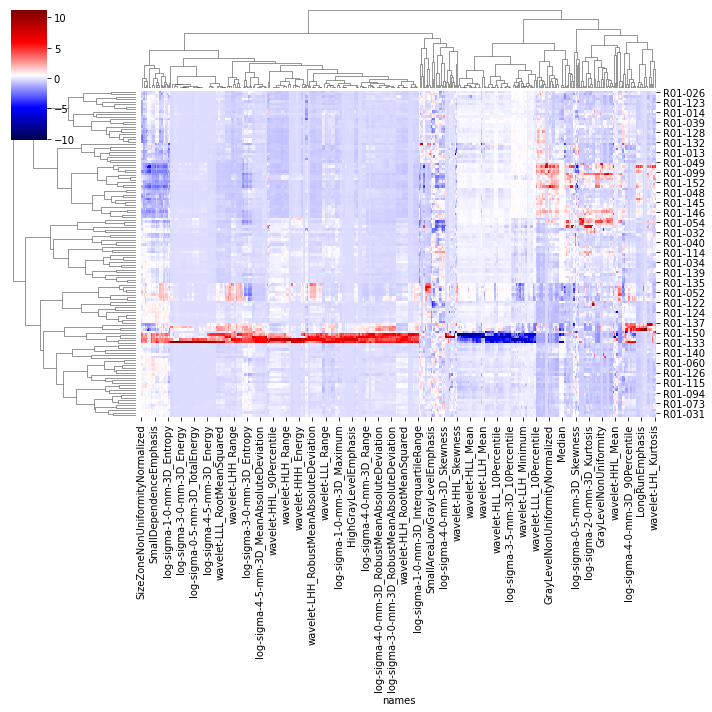

In [ ]:
# you may remove paitient ID if you intend to use this heatmap for a manuscript of presentation
sns.clustermap(IM.astype(float), z_score=True, cmap="seismic", method='complete', metric = 'correlation') #shift+Tab

In ML books way to standardize data.

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(im.T)
imz = scaler.transform(im.T).T
imz.shape
pd.DataFrame(imz)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.144836,-0.073849,-0.031273,-0.190223,0.991403,-0.019242,0.169355,-1.827090,0.088449,0.242802,...,0.515014,-1.237663,0.410427,-0.704061,-0.101592,-0.108866,0.721938,-2.535025,-0.712293,0.144053
1,0.265322,-0.337815,0.322039,-0.784269,1.502685,0.739395,0.875432,-1.740215,0.714904,0.625992,...,0.245332,-0.753157,0.352529,0.047454,-2.131698,0.674236,0.653141,-2.290671,-0.236084,-0.305389
2,-0.666533,-0.824106,-0.169801,-0.546118,-0.780858,0.764668,-0.640261,-0.406756,2.141829,-0.878214,...,-0.625248,0.040507,0.106805,0.078448,-1.540322,1.858866,1.605473,-0.751251,-0.883249,1.079141
3,-0.519436,-0.507899,-0.299237,-0.233114,-0.684695,0.010808,-0.580525,0.408717,0.586107,-0.653919,...,-0.497312,0.142742,-0.179381,-0.117150,-0.764369,0.484474,0.386167,0.633620,-0.556802,0.546453
4,-0.696504,-0.652838,-0.330746,-0.225237,-0.856263,0.037619,-0.734551,-0.487254,1.145896,-0.896668,...,-0.575010,0.592527,-0.195493,0.030274,-1.112684,1.009077,0.881671,-0.495799,-0.882451,1.045006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,-0.172700,-0.046107,-0.601255,-0.463439,-0.462945,-0.083988,-0.344843,0.285643,-0.548637,-0.496163,...,0.155993,-0.123454,-0.590425,-0.458448,-0.225995,-0.450259,-0.357990,0.470884,2.867353,-0.636548
427,0.224414,0.310617,-1.120033,-0.007654,0.092802,0.645709,0.469801,1.721944,-1.133559,0.386524,...,-1.033217,0.637094,-1.769273,-0.414145,0.666662,-1.262205,-0.554085,1.007003,-0.502359,-3.698434
428,-0.130939,-0.130010,-0.133435,-0.131893,-0.133833,-0.093413,-0.132674,-0.109722,-0.113853,-0.133950,...,-0.122317,-0.104639,-0.132741,-0.129782,-0.134164,-0.099227,-0.084968,-0.109106,-0.056212,-0.129405
429,-0.464931,-0.562547,1.722972,0.248144,-0.322032,-0.643469,-0.021818,-0.490963,1.713496,0.329871,...,-0.477204,-0.596814,2.157689,2.268019,-0.033923,2.464986,1.027414,-0.476887,-0.808112,5.154459


We got the same result doing my way of zscoring or preprocessing model in skilearn (IM = imz).

In [ ]:
# BIC for GMM
from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        gmm.fit(IM)
        score.append((cov,n_comp,gmm.bic(IM)))
score

Minimum score is for p = 13 ('spherical', 13, -323.6849256731439),


In [ ]:
D = make_adjacency(IM, eps = 386, dist_func = "correlation")
z = isomap(D, dim = 13)
z.shape

(130, 13)

In [ ]:
D

array([[0.        , 0.27218209, 1.17052957, ..., 1.13907288, 0.87230089,
        1.51958712],
       [0.27218209, 0.        , 1.32813485, ..., 0.92642761, 1.06126121,
        1.5600724 ],
       [1.17052957, 1.32813485, 0.        , ..., 0.89353321, 1.29743834,
        0.34905755],
       ...,
       [1.13907288, 0.92642761, 0.89353321, ..., 0.        , 1.42772604,
        0.93715337],
       [0.87230089, 1.06126121, 1.29743834, ..., 1.42772604, 0.        ,
        1.32884493],
       [1.51958712, 1.5600724 , 0.34905755, ..., 0.93715337, 1.32884493,
        0.        ]])

In [ ]:
z

array([[ 0.23193285,  0.1998755 ,  0.42992464, ..., -0.31111367,
         0.83421002, -0.87876173],
       [ 0.25064318,  0.24499034,  0.08117235, ..., -1.02735157,
         0.05496541, -2.03219766],
       [-0.28339963, -0.08433847,  0.44599563, ..., -0.14641592,
        -0.53387547, -0.59169893],
       ...,
       [-0.09846872,  0.42462601, -0.39696095, ...,  0.72641122,
        -1.25677095,  0.26674672],
       [ 0.20113365, -0.16669853,  0.06861063, ...,  0.80439285,
        -1.03591101,  0.23565956],
       [-0.33154228, -0.18228117, -0.10868101, ...,  0.95548009,
        -0.41717906, -0.92791014]])

# CT - Sandy 130

How many clusters are sufficient? Elbow

In [ ]:
IM

names,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Maximum2DDiameterSlice,Maximum3DDiameter,MeshVolume,MinorAxisLength,...,wavelet-LLL_Mean,wavelet-LLL_Median,wavelet-LLL_Minimum,wavelet-LLL_Range,wavelet-LLL_RobustMeanAbsoluteDeviation,wavelet-LLL_RootMeanSquared,wavelet-LLL_Skewness,wavelet-LLL_TotalEnergy,wavelet-LLL_Uniformity,wavelet-LLL_Variance
R01-003,0.144836,0.265322,-0.666533,-0.519436,-0.696504,-0.594711,-0.590659,-0.593937,-0.400886,-0.783605,...,0.187651,0.278280,0.194698,-0.245648,0.055660,-0.172700,0.224414,-0.130939,-0.464931,-0.159514
R01-004,-0.073849,-0.337815,-0.824106,-0.507899,-0.652838,-0.549438,-0.904654,-0.631997,-0.405623,-0.810021,...,0.078672,0.218405,0.194249,-0.244022,0.231321,-0.046107,0.310617,-0.130010,-0.562547,-0.131191
R01-005,-0.031273,0.322039,-0.169801,-0.299237,-0.330746,-0.458505,-0.201009,-0.417178,-0.313558,-0.360914,...,0.613188,0.563109,0.256705,-0.282954,-0.512246,-0.601255,-1.120033,-0.133435,1.722972,-0.215082
R01-006,-0.190223,-0.784269,-0.546118,-0.233114,-0.225237,-0.208679,-0.526452,-0.371042,-0.339880,-0.280223,...,0.404645,0.402647,0.320913,-0.434317,-0.315100,-0.463439,-0.007654,-0.131893,0.248144,-0.206922
R01-007,0.991403,1.502685,-0.780858,-0.684695,-0.856263,-0.873245,-1.137743,-0.824677,-0.416754,-1.016832,...,0.611992,0.620894,0.503113,-0.457186,-0.270551,-0.462945,0.092802,-0.133833,-0.322032,-0.197764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R01-156,-0.108866,0.674236,1.858866,0.484474,1.009077,1.097184,0.829768,0.463521,0.913046,1.232943,...,0.554218,0.583469,0.255017,-0.294980,-0.498358,-0.450259,-1.262205,-0.099227,2.464986,-0.196931
R01-157,0.721938,0.653141,1.605473,0.386167,0.881671,0.851922,1.369728,0.457207,0.687829,1.581246,...,0.457348,0.598742,0.277183,-0.308133,-0.265674,-0.357990,-0.554085,-0.084968,1.027414,-0.183264
R01-158,-2.535025,-2.290671,-0.751251,0.633620,-0.495799,-0.705256,0.807879,0.109401,-0.376195,-0.356414,...,-0.970347,-1.215406,0.184492,-0.460369,-0.180141,0.470884,1.007003,-0.109106,-0.476887,-0.193231
R01-159,-0.712293,-0.236084,-0.883249,-0.556802,-0.882451,-0.778687,-0.948514,-0.753800,-0.415067,-1.047817,...,-1.205498,0.510351,-4.669707,4.398892,2.609782,2.867353,-0.502359,-0.056212,-0.808112,2.854391


### Elbow

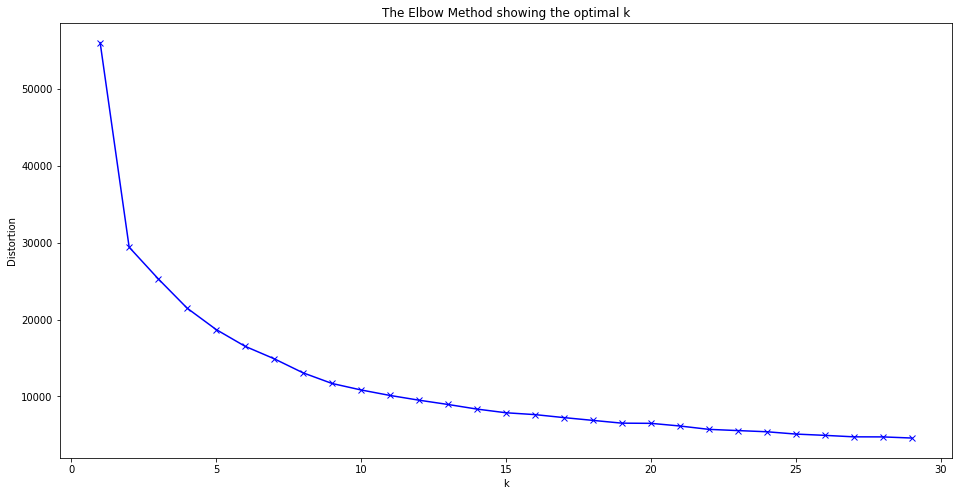

In [ ]:

# Code from https://predictivehacks.com/k-means-elbow-method-code-for-python/
from sklearn.cluster import KMeans
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(IM)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

k = 9 would be sufficient number of cluster

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7cda9e3d0>,
                 estimator=KMeans(n_clusters=29), k=(2, 30))

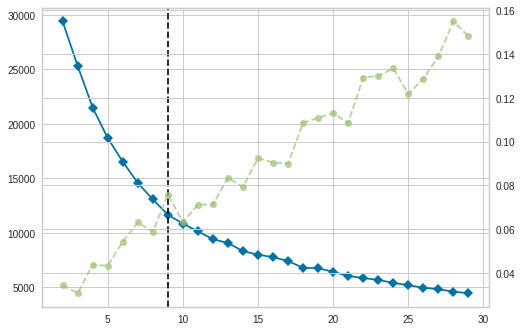

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(IM)        # Fit data to visualizer
# visualizer.show()        # Finalize and render figure

### PR-Isomap
Now we apply PR-Isomap to the CT-images

In [ ]:
embedding = Isomap(n_components=9, radius = 16, rdx =1)
X_transformed_pr = embedding.fit_transform(IM)
X_transformed_pr.shape

(130, 9)

In [ ]:
X_transformed_pr

array([[ 0.00951894, -0.35787747, -0.05860763, ..., -0.01657106,
         0.05808164,  0.24894959],
       [ 0.0361073 , -0.37391089, -0.02483444, ..., -0.0730113 ,
         0.06762545, -0.04366612],
       [-0.89658954,  0.04937927, -0.49213901, ...,  0.39164248,
        -0.06551953,  0.5526873 ],
       ...,
       [ 0.0232021 , -0.21065355, -0.40748271, ...,  0.02919553,
         0.09454825,  0.11047015],
       [ 0.49301282,  0.86042318, -0.01636322, ...,  0.03219777,
        -0.10173319, -0.02671781],
       [ 0.49301282,  0.86042318, -0.01636322, ...,  0.03219777,
        -0.10173319, -0.02671781]])

In [ ]:
X_out = pd.DataFrame(X_transformed_pr, index = IM.index, columns = ['prisom-'+str(i) for i in range(1,10)])
X_out.to_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/prisom-LD-radmc_Sandy130_9.csv")

In [ ]:
X_out

,prisom-1,prisom-2,prisom-3,prisom-4,prisom-5,prisom-6,prisom-7,prisom-8,prisom-9
R01-003,0.009519,-0.357877,-0.058608,-0.010560,0.149899,0.152949,-0.016571,0.058082,0.248950
R01-004,0.036107,-0.373911,-0.024834,-0.068387,0.370373,0.073571,-0.073011,0.067625,-0.043666
R01-005,-0.896590,0.049379,-0.492139,-0.133286,-0.918560,0.461980,0.391642,-0.065520,0.552687
R01-006,-0.873129,-0.203503,-0.567522,-0.140729,-0.182568,0.062633,0.412459,-0.151492,0.150116
R01-007,0.060479,-0.330338,-0.185372,-0.039748,0.325580,-0.291570,0.078276,0.306919,-0.299026
...,...,...,...,...,...,...,...,...,...
R01-156,-0.972406,0.961199,-0.171429,-0.468140,-0.216100,-0.478999,-0.355815,0.034427,0.500344
R01-157,-1.006384,0.248186,-0.060935,0.469103,-0.365411,0.254439,-0.170971,0.184286,0.570913
R01-158,0.023202,-0.210654,-0.407483,-0.152072,0.375292,0.610960,0.029196,0.094548,0.110470
R01-159,0.493013,0.860423,-0.016363,0.062413,0.111525,0.098104,0.032198,-0.101733,-0.026718


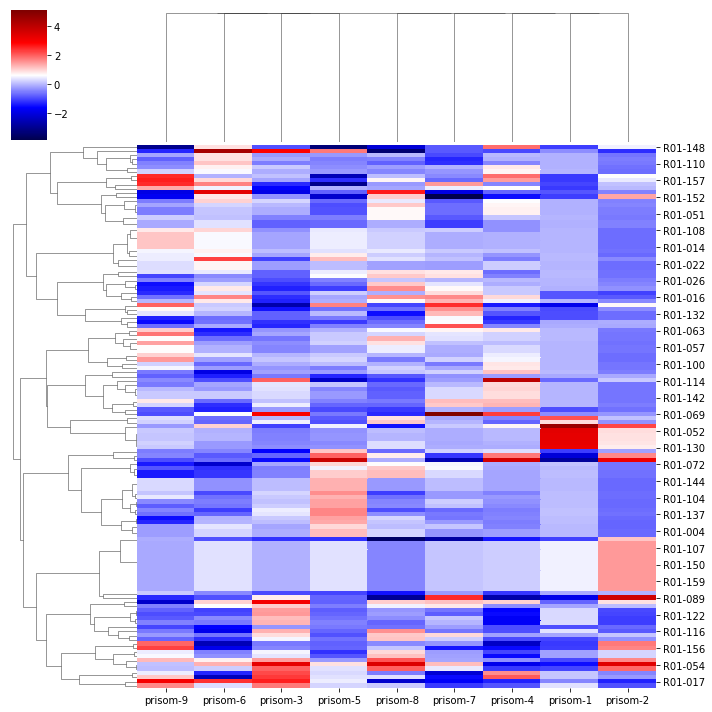

In [ ]:
# you may remove paitient ID if you intend to use this heatmap for a manuscript of presentation
sns.clustermap(X_out.astype(float), z_score=True, cmap="seismic", method='complete', metric = 'correlation') #shift+Tab

Evaluation of predictive power

In [ ]:
#  extracting outcome
yy = pd.read_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-NSCLCRadiogenomic_Clinical_half.csv", index_col=0)

# if yy["Survival Status"] == "Alive" && yy["Survival Status"] == "Dead"
yy["Survival Status"] = yy["Survival Status"].str.replace('Alive','1')
yy["Survival Status"] = yy["Survival Status"].str.replace('Dead','0')
y = yy["Survival Status"]

RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=45)
RF.fit(X_out, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = X_out, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 78.45 %
Standard Deviation: 4.42 %


LR

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV
# clf = LogisticRegressionCV(cv=6, random_state=0).fit(X_out, y)
# clf.score(X_out, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_out, y)
clf.score(X_out, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_out, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 76.15 %
Standard Deviation: 3.72 %


NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_out, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = X_out, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.85 %
Standard Deviation: 10.19 %


Kernel SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_out, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = X_out, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.06 %
Standard Deviation: 2.07 %


###  Standard Isomap 
without parzen-rosenblatt window modification

In [ ]:
embedding = Isomap(n_components=9, n_neighbors=100, rdx = 0)
X_transformed = embedding.fit_transform(IM)
X_transformed.shape

(130, 9)

In [ ]:

X_outIS = pd.DataFrame(X_transformed, index = IM.index, columns = ['isom-'+str(i) for i in range(1,10)])
X_outIS.to_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/isom-LD-radmc_Sandy130_9.csv")
X_outIS

,isom-1,isom-2,isom-3,isom-4,isom-5,isom-6,isom-7,isom-8,isom-9
R01-003,1.569918,-1.100876,-1.784231,0.666487,1.155734,-0.194315,-0.740782,-0.328805,0.632124
R01-004,1.505897,-1.396856,-0.207945,-0.789677,0.841614,-0.457607,-0.791068,0.459543,0.516881
R01-005,-9.954058,0.614014,-1.008298,7.034575,1.249432,0.036642,-3.632110,-1.873888,2.246162
R01-006,-9.846758,-1.846667,1.028257,5.065841,0.644183,1.448006,-3.516030,1.073736,-1.565204
R01-007,1.579869,-2.230657,-2.680367,-0.558610,0.990355,-0.929725,-2.789927,-2.950964,2.044314
...,...,...,...,...,...,...,...,...,...
R01-156,-16.841565,2.447144,2.016887,5.550218,-1.625580,1.119550,-1.511693,2.690050,5.571447
R01-157,-11.741903,0.717455,3.079782,-0.771794,-0.383625,1.073994,-0.794016,-0.664491,-2.526702
R01-158,-10.401544,-8.156167,5.036415,-4.305375,-1.520977,0.856699,-1.397723,1.915480,-1.601635
R01-159,74.407421,-3.055253,-30.170689,14.147013,-10.808710,28.637338,2.347410,-3.424404,-0.119387


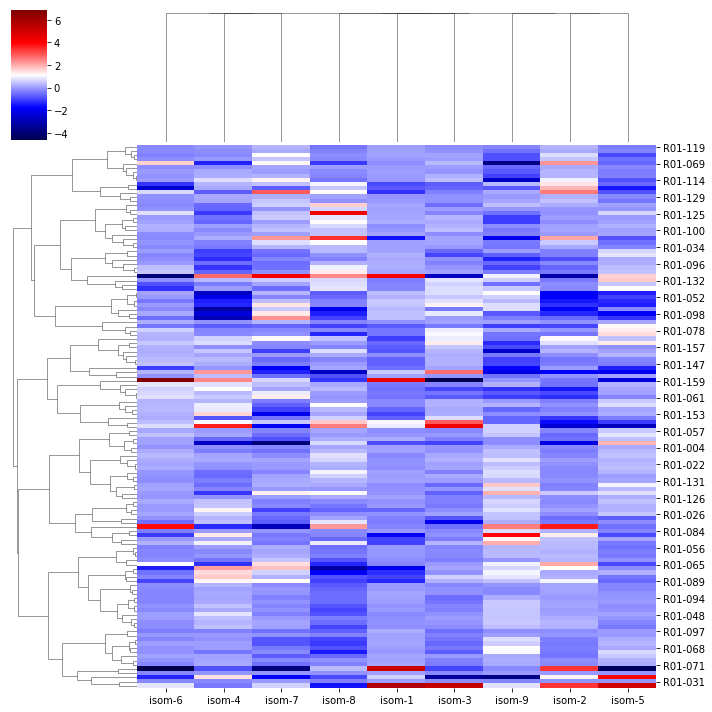

In [ ]:
# you may remove paitient ID if you intend to use this heatmap for a manuscript of presentation
sns.clustermap(X_outIS.astype(float), z_score=True, cmap="seismic", method='complete', metric = 'correlation') #shift+Tab

Evaluation of predictive power

In [ ]:
#  extracting outcome
yy = pd.read_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-NSCLCRadiogenomic_Clinical_half.csv", index_col=0)

# if yy["Survival Status"] == "Alive" && yy["Survival Status"] == "Dead"
yy["Survival Status"] = yy["Survival Status"].str.replace('Alive','1')
yy["Survival Status"] = yy["Survival Status"].str.replace('Dead','0')
y = yy["Survival Status"]

RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=45)
RF.fit(X_outIS, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = X_outIS, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 76.98 %
Standard Deviation: 5.74 %


LR

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV
# clf = LogisticRegressionCV(cv=6, random_state=0).fit(X_out, y)
# clf.score(X_out, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_outIS, y)
clf.score(X_outIS, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_outIS, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.76 %
Standard Deviation: 5.84 %


NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_outIS, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = X_outIS, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.94 %
Standard Deviation: 6.75 %


Kernel SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_outIS, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = X_outIS, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.27 %
Standard Deviation: 2.59 %


###  PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pci = pca.fit_transform(IM)

pci.shape

(130, 9)

In [ ]:
X_outpca = pd.DataFrame(pci, index = IM.index, columns = ['pca-'+str(i) for i in range(1,10)])
X_outpca.to_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/pca-LD-CTradmc_Sandy130_9.csv")
X_outpca

,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9
R01-003,-0.177816,-4.850904,0.228226,0.421582,2.516907,-0.916030,-0.578547,0.608128,0.674509
R01-004,-0.340513,-4.955127,-2.086898,0.318132,1.465456,-0.642709,-0.568338,0.998072,0.236797
R01-005,-6.925515,4.522228,4.704215,2.015573,2.507501,-3.372861,-0.621972,-3.376442,2.048793
R01-006,-6.337724,2.925961,2.639248,3.403117,2.929917,-2.123889,-0.592354,-1.743832,-1.724834
R01-007,-0.515675,-5.918059,0.294304,-0.973098,2.035677,-1.576054,-1.455893,-0.331924,1.355437
...,...,...,...,...,...,...,...,...,...
R01-156,-9.000381,10.370093,4.098111,0.962329,-0.308838,0.159866,-0.322715,-2.918453,0.538944
R01-157,-7.633389,5.538079,1.566028,0.021269,0.486222,1.192402,1.279153,-0.869254,-3.162334
R01-158,-6.029577,-1.283578,-3.839040,4.586055,0.180797,2.071124,2.242379,-2.086476,-2.787761
R01-159,70.802720,-8.222777,36.553938,8.140951,-5.906904,-0.864029,22.048493,3.905445,-0.795176


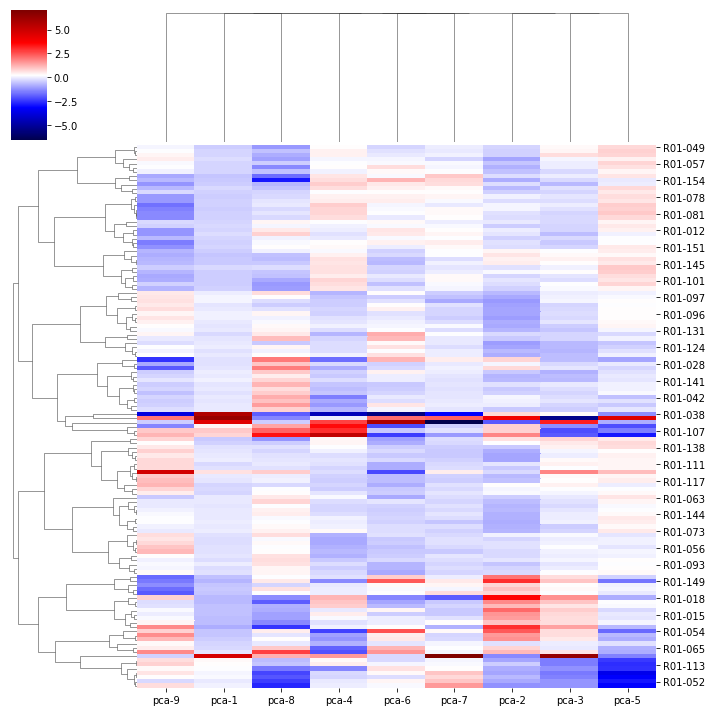

In [ ]:
# you may remove paitient ID if you intend to use this heatmap for a manuscript of presentation
sns.clustermap(X_outpca.astype(float), z_score=True, cmap="seismic", method='complete', metric = 'correlation') #shift+Tab

Evaluation of predictive power

In [ ]:
#  extracting outcome
yy = pd.read_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-NSCLCRadiogenomic_Clinical_half.csv", index_col=0)

# if yy["Survival Status"] == "Alive" && yy["Survival Status"] == "Dead"
yy["Survival Status"] = yy["Survival Status"].str.replace('Alive','1')
yy["Survival Status"] = yy["Survival Status"].str.replace('Dead','0')
y = yy["Survival Status"]

RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=45)
RF.fit(X_outpca, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = X_outpca, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 73.81 %
Standard Deviation: 7.60 %


LR

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV
# clf = LogisticRegressionCV(cv=6, random_state=0).fit(X_out, y)
# clf.score(X_out, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_outpca, y)
clf.score(X_outpca, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_outpca, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.59 %
Standard Deviation: 4.98 %


NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_outpca, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = X_outpca, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 64.52 %
Standard Deviation: 16.01 %


Kernel SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_outpca, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = X_outpca, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.27 %
Standard Deviation: 2.59 %


###  tSNE

In [ ]:
from sklearn.manifold import TSNE
#from sklearn.utils.extmath import _ravel
# Random state we define this random state to use this value in TSNE which is a randmized algo.
RS = 25111993
X_embedded = TSNE(n_components=9,  n_iter=500, random_state=3, method = 'exact').fit_transform(IM)
X_embedded.shape

In [ ]:
X_outtsne = pd.DataFrame(X_embedded, index = IM.index, columns = ['tsne-'+str(i) for i in range(1,10)])
X_outtsne.to_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/tsne-LD-CTradmc_Sandy130_9.csv")
X_outtsne

,tsne-1,tsne-2,tsne-3,tsne-4,tsne-5,tsne-6,tsne-7,tsne-8,tsne-9
R01-003,-17.650455,-7.368150,0.285584,18.646299,3.236231,3.800282,1.806566,5.817752,-1.104860
R01-004,8.204426,13.440866,-8.381252,-9.485641,-13.577823,-1.279814,4.327542,4.040351,10.817680
R01-005,0.187894,5.961414,3.842896,3.848069,-3.126881,-3.940958,1.733218,5.278902,-2.449521
R01-006,-0.981678,5.977650,1.083177,-0.743155,-7.270830,3.639482,1.074921,0.364070,5.342746
R01-007,5.150778,0.357992,-2.541786,-1.305016,4.908017,-1.477309,1.473162,8.764837,2.957569
...,...,...,...,...,...,...,...,...,...
R01-156,-4.861618,9.152488,1.788822,-3.468311,1.193980,-0.413608,-2.684074,1.896176,-0.147507
R01-157,-1.660785,6.372485,6.342999,-0.074508,3.902034,-0.668330,5.748402,3.139125,2.817581
R01-158,0.490132,-0.226036,0.095535,1.708264,4.292878,1.855710,2.662739,6.711909,-6.308552
R01-159,-0.603261,-7.622287,4.519480,2.645288,1.436801,9.282086,0.933391,-4.514657,-0.467996


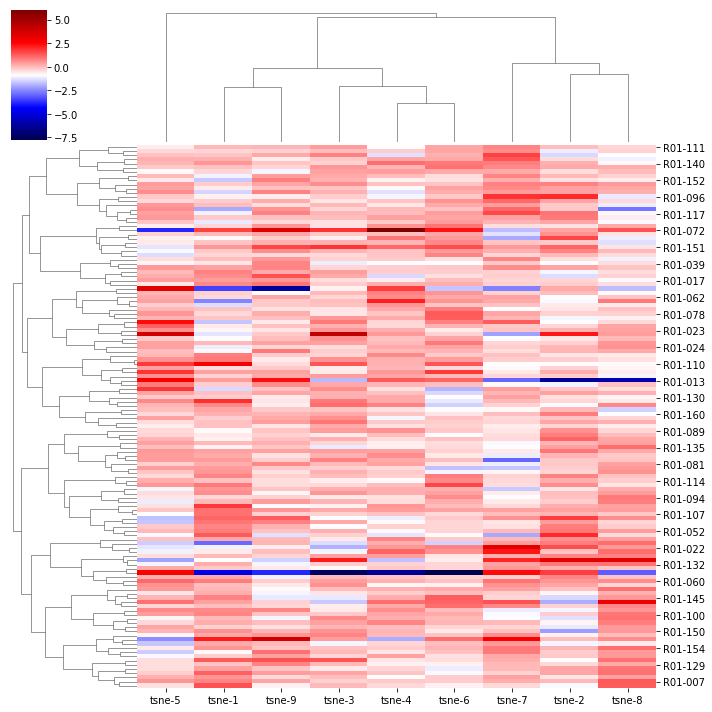

In [ ]:
# you may remove paitient ID if you intend to use this heatmap for a manuscript of presentation
sns.clustermap(X_outtsne.astype(float), z_score=True, cmap="seismic", method='complete', metric = 'correlation') #shift+Tab

Evaluation of predictive power

In [ ]:
#  extracting outcome
yy = pd.read_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-NSCLCRadiogenomic_Clinical_half.csv", index_col=0)

# if yy["Survival Status"] == "Alive" && yy["Survival Status"] == "Dead"
yy["Survival Status"] = yy["Survival Status"].str.replace('Alive','1')
yy["Survival Status"] = yy["Survival Status"].str.replace('Dead','0')
y = yy["Survival Status"]

RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=45)
RF.fit(X_outtsne, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = X_outtsne, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 76.93 %
Standard Deviation: 4.04 %


LR

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV
# clf = LogisticRegressionCV(cv=6, random_state=0).fit(X_out, y)
# clf.score(X_out, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_outtsne, y)
clf.score(X_outtsne, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_outtsne, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.60 %
Standard Deviation: 9.46 %


NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_outtsne, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = X_outtsne, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 62.09 %
Standard Deviation: 16.54 %


Kernel SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_outtsne, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = X_outtsne, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.27 %
Standard Deviation: 2.59 %


### UMAP

In [ ]:
!pip install umap-learn
import umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ed8abd489237890447e778f7663ede727a1597f715676a977c434e05bc0155a6
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=82f0ff6d53e60dc4435f4b859b7e72e08edf3dd6297727306a7a2406e00531c7
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
# -- UMAP
reducer = umap.UMAP(n_components = 9, n_neighbors=20, n_epochs=100, random_state=8)
embedding = reducer.fit_transform(IM)

In [ ]:
embedding.shape

(130, 9)

In [ ]:
embedding 

In [ ]:
X_outumap = pd.DataFrame(embedding, index = IM.index, columns = ['umap-'+str(i) for i in range(1,10)])
X_out.to_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/umap-LD-CTradmc_Sandy130_9.csv")
X_outumap

,umap-1,umap-2,umap-3,umap-4,umap-5,umap-6,umap-7,umap-8,umap-9
R01-003,6.508590,4.248120,2.545671,6.862925,3.954108,2.053586,3.323852,6.696914,5.115172
R01-004,6.526993,4.081605,2.912676,6.793992,3.865149,1.868965,3.543459,6.086728,5.124961
R01-005,3.506036,4.259981,3.658510,5.189448,4.212626,2.190601,3.319184,4.862648,2.850700
R01-006,3.572555,4.261050,3.692811,5.203778,4.378859,2.142384,3.341130,4.781361,2.931748
R01-007,6.370584,4.612517,2.505557,6.980450,3.891265,2.000379,3.394988,6.694629,4.742432
...,...,...,...,...,...,...,...,...,...
R01-156,3.472706,4.072400,3.464982,5.234029,4.016866,2.105252,3.062421,4.922281,3.226562
R01-157,3.464014,4.031785,3.475164,5.215837,4.059996,2.018517,3.047245,4.841033,3.319050
R01-158,5.031458,4.739960,3.746578,5.574310,5.413727,2.445919,4.071980,4.782335,3.220163
R01-159,6.821894,3.708921,2.705784,6.390466,4.387599,2.187014,3.671256,6.158439,5.242925


Evaluation of predictive power

In [ ]:
#  extracting outcome
yy = pd.read_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-NSCLCRadiogenomic_Clinical_half.csv", index_col=0)

# if yy["Survival Status"] == "Alive" && yy["Survival Status"] == "Dead"
yy["Survival Status"] = yy["Survival Status"].str.replace('Alive','1')
yy["Survival Status"] = yy["Survival Status"].str.replace('Dead','0')
y = yy["Survival Status"]

RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=45)
RF.fit(X_outumap, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = X_outumap, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 75.51 %
Standard Deviation: 6.31 %


LR

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV
# clf = LogisticRegressionCV(cv=6, random_state=0).fit(X_out, y)
# clf.score(X_out, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_outumap, y)
clf.score(X_outumap, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_outumap, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.27 %
Standard Deviation: 2.59 %


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_outumap, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = X_outumap, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.77 %
Standard Deviation: 13.70 %


Kernel SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_outumap, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = X_outumap, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.27 %
Standard Deviation: 2.59 %


# Visualizer


In [ ]:
!pip install umap-learn
import umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px



def hd_visualizer(dff, names_3d = ['UMAP1-priso','UMAP2-priso','UMAP3-priso']):
  ''''
  data:        data frame with indices and columns
  names_3d:    a list containing names for each axes of data visualization
  '''
  # project dimension of the data to 3D so we can demonstrate it.
  reducer = umap.UMAP(n_components = 3, n_neighbors=20, n_epochs=100, random_state=8)
  emb3d = reducer.fit_transform(dff)

  df3d = pd.DataFrame(emb3d, index = dff.index, columns=names_3d)

  # index to label
  df3d['label'] = df3d.index

  # Dealing with outliers
  q = df3d.T.iloc[0].quantile(0.99)
  df3d[df3d.T.iloc[0] < q]
  q_low = df3d.T.iloc[0].quantile(0.01)
  q_hi  = df3d.T.iloc[0].quantile(0.99)
  df_filtered1 = df3d[(df3d.T.iloc[0] < q_hi) & (df3d.T.iloc[0] > q_low)]

  df3d = df_filtered1

  q = df3d.T.iloc[1].quantile(0.99)
  df3d[df3d.T.iloc[1] < q]
  q_low = df3d.T.iloc[1].quantile(0.01)
  q_hi  = df3d.T.iloc[1].quantile(0.99)
  df_filtered2 = df3d[(df3d.T.iloc[1] < q_hi) & (df3d.T.iloc[1] > q_low)]

  df3d = df_filtered2

  q = df3d.T.iloc[2].quantile(0.99)
  df3d[df3d.T.iloc[2] < q]
  q_low = df3d.T.iloc[2].quantile(0.01)
  q_hi  = df3d.T.iloc[2].quantile(0.99)
  df_filtered3 = df3d[(df3d.T.iloc[2] < q_hi) & (df3d.T.iloc[2] > q_low)]

  df3d = df_filtered3



  fig = px.scatter_3d(df3d, x=names_3d[0], y=names_3d[1], z=names_3d[2], color='label', )
  fig.show()


# MNIST

In [ ]:
IM = pd.read_csv('/content/gdrive/MyDrive/colab/ml-datasets/mnist.csv', index_col = 0)
IM.shape

(70000, 784)

In [ ]:
IM.shape, 28*28

((70000, 784), 784)

In [ ]:
IM2 = IM[:2000].dropna()
# IM2 = pd.DatFrame(IM2, index = IM2.index, columns = IM2.columns)

In [ ]:
IM2.shape

(10000, 784)



How many clusters are sufficient? Elbow

### PR-Isomap
Now we apply PR-Isomap to the CT-images

In [ ]:
embedding = Isomap(n_components=10, radius = 3000, rdx = 1)
X_transformed_pr = embedding.fit_transform(IM[:2000])
X_transformed_pr.shape

(2000, 10)

In [ ]:
X_transformed_pr

array([[ 0.21133053,  0.15076873, -0.09204174, ...,  0.00749607,
        -0.14077076, -0.15306252],
       [ 0.54985839,  0.04707869, -0.11668239, ...,  0.13246627,
         0.05162657,  0.10358099],
       [-0.37415303, -0.02086019,  0.24260101, ..., -0.22623223,
        -0.09935111, -0.09755366],
       ...,
       [ 0.74927184,  0.59217661, -0.5689324 , ...,  0.22754051,
        -0.49327735,  0.00357495],
       [-0.18230493, -0.01752463, -0.06447855, ..., -0.03912575,
        -0.20666672,  0.05106644],
       [ 1.3212345 ,  0.27662979, -0.06922997, ..., -0.02614065,
         0.63147158,  0.55852665]])

In [ ]:
dff = pd.DataFrame(X_transformed_pr, index = IM[:2000].index, columns = ['Isompr-'+str(i) for i in range(1,11)])
# dff.to_csv('/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-Rad_isompr.csv')
dff

,Isompr-1,Isompr-2,Isompr-3,Isompr-4,Isompr-5,Isompr-6,Isompr-7,Isompr-8,Isompr-9,Isompr-10
label,,,,,,,,,,
5,0.211331,0.150769,-0.092042,-0.215714,-0.187278,-0.180481,0.030551,0.007496,-0.140771,-0.153063
0,0.549858,0.047079,-0.116682,0.091770,-0.288107,-0.103381,0.123479,0.132466,0.051627,0.103581
4,-0.374153,-0.020860,0.242601,0.383358,-0.199636,0.377674,-0.269915,-0.226232,-0.099351,-0.097554
1,-0.392713,-0.031001,-0.292955,0.081856,-0.183803,0.167859,0.095108,-0.107674,0.264900,0.072816
9,-0.085062,-0.016454,0.243721,-0.144775,-0.000938,0.010232,-0.027351,0.159899,0.143565,-0.185514
...,...,...,...,...,...,...,...,...,...,...
0,1.306615,0.199202,0.258021,0.493890,0.223685,-0.510020,0.279357,-0.024778,0.702831,0.397464
5,0.021532,0.292112,0.036660,-0.036063,-0.129558,0.034915,-0.019210,0.160439,-0.093354,-0.169169
5,0.749272,0.592177,-0.568932,-0.657186,0.391303,-0.611857,-0.077042,0.227541,-0.493277,0.003575


In [ ]:
hd_visualizer(dff, names_3d = ['UMAP1-isopr','UMAP2-isopr','UMAP3-isopr'])

Evaluation of predictive power

In [ ]:
#  extracting outcome
y = dff.index #pd.read_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-NSCLCRadiogenomic_Clinical_half.csv", index_col=0)
y
# # if yy["Survival Status"] == "Alive" && yy["Survival Status"] == "Dead"
# yy["Survival Status"] = yy["Survival Status"].str.replace('Alive','1')
# yy["Survival Status"] = yy["Survival Status"].str.replace('Dead','0')
# y = yy["Survival Status"]

Int64Index([5, 0, 4, 1, 9, 2, 1, 3, 1, 4,
            ...
            6, 5, 4, 5, 3, 0, 5, 5, 2, 0],
           dtype='int64', name='label', length=2000)

RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=45)
RF.fit(dff, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = dff, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 64.95 %
Standard Deviation: 4.34 %


LR

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV
# clf = LogisticRegressionCV(cv=6, random_state=0).fit(X_out, y)
# clf.score(X_out, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(dff, y)
clf.score(dff, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = dff, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.25 %
Standard Deviation: 3.72 %


NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(dff, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = dff, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 61.00 %
Standard Deviation: 4.34 %


Kernel SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(dff, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = dff, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.25 %
Standard Deviation: 1.57 %


###  Standard Isomap 
without parzen-rosenblatt window modification

In [ ]:
embedding = Isomap(n_components=10, n_neighbors=10, rdx = 0)
X_transformed = embedding.fit_transform(IM[:2000])
X_transformed.shape

(2000, 10)

In [ ]:
X_transformed

array([[ 1342.67526474,  1519.01788299, -2573.47603798, ...,
          317.04299619,   -75.41517137,  -876.69611541],
       [ 5161.29910169, -1958.12752847,  2725.08599873, ...,
         -932.02797487,  -740.57894069,   238.67412589],
       [-1744.78319848, -2309.04362974,    42.43784693, ...,
          595.1617352 ,  -807.53798608,   409.79625831],
       ...,
       [ 3967.43529753,   -46.08590796, -3232.24916861, ...,
         -211.95716237,  2139.41301575, -1067.19376131],
       [-1380.00718066,  1837.73538505, -1237.93873071, ...,
          762.01679212,  -499.8000352 ,  -531.70575251],
       [ 6477.64872276, -1507.7883692 ,  3899.44329274, ...,
        -1686.59228298,  -959.71065845,  2202.60937511]])

In [ ]:
dff = pd.DataFrame(X_transformed, index = IM[:2000].index, columns = ['Isom-'+str(i) for i in range(1,11)])
# dff.to_csv('/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-Rad_isompr.csv')
dff

,Isom-1,Isom-2,Isom-3,Isom-4,Isom-5,Isom-6,Isom-7,Isom-8,Isom-9,Isom-10
label,,,,,,,,,,
5,1342.675265,1519.017883,-2573.476038,1765.290492,-1633.113913,-2191.919880,510.304288,317.042996,-75.415171,-876.696115
0,5161.299102,-1958.127528,2725.085999,1671.205604,977.069651,884.970875,1344.689792,-932.027975,-740.578941,238.674126
4,-1744.783198,-2309.043630,42.437847,-772.958891,1039.218066,260.106224,2867.099509,595.161735,-807.537986,409.796258
1,-995.154973,2662.317090,-472.844193,-1654.700574,2151.730186,1308.398535,646.067012,-1344.802752,1294.377610,10.756135
9,-3232.206981,-1710.462343,-472.362793,378.167097,-1481.973025,-617.173218,-126.131778,-264.862183,-1692.530698,-368.764505
...,...,...,...,...,...,...,...,...,...,...
0,4611.535053,-2808.421778,3472.324562,918.275691,2720.899424,-1073.198769,-1558.881363,-1423.261317,-530.533934,1823.856998
5,1577.486795,303.512695,-3109.091802,2302.856994,-791.365260,-1048.669477,1493.881222,-1415.798854,-520.062074,-529.221122
5,3967.435298,-46.085908,-3232.249169,2173.234103,-472.074781,-527.666559,2.332012,-211.957162,2139.413016,-1067.193761


In [ ]:
hd_visualizer(dff, names_3d = ['UMAP1-iso','UMAP2-iso','UMAP3-iso'])

Evaluation of predictive power

In [ ]:
#  extracting outcome
y = dff.index #pd.read_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-NSCLCRadiogenomic_Clinical_half.csv", index_col=0)
y
# # if yy["Survival Status"] == "Alive" && yy["Survival Status"] == "Dead"
# yy["Survival Status"] = yy["Survival Status"].str.replace('Alive','1')
# yy["Survival Status"] = yy["Survival Status"].str.replace('Dead','0')
# y = yy["Survival Status"]

Int64Index([5, 0, 4, 1, 9, 2, 1, 3, 1, 4,
            ...
            6, 5, 4, 5, 3, 0, 5, 5, 2, 0],
           dtype='int64', name='label', length=2000)

RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=45)
RF.fit(dff, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = dff, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 77.60 %
Standard Deviation: 4.16 %


LR

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV
# clf = LogisticRegressionCV(cv=6, random_state=0).fit(X_out, y)
# clf.score(X_out, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(dff, y)
clf.score(dff, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = dff, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

Accuracy: 84.55 %
Standard Deviation: 2.45 %


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(dff, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = dff, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.25 %
Standard Deviation: 2.28 %


Kernel SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(dff, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = dff, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.30 %
Standard Deviation: 1.49 %


###  PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pci = pca.fit_transform(IM[:10000])

pci.shape

(10000, 10)

In [ ]:
pci

array([[ 108.22909492, -336.86788282,  -12.46742494, ...,  152.92941876,
        -355.88522202, -209.6026471 ],
       [1026.54672823, -381.93264148,  535.28043416, ..., -134.98436744,
          74.63044056,  -72.68810716],
       [ -41.72965496,  405.23769466, -263.82994249, ...,  372.48851588,
         -55.06765242,  152.4651633 ],
       ...,
       [-485.47614546, -337.31788071,  765.11608071, ...,  389.49739919,
         392.12369086, -334.50062004],
       [-364.6245548 ,  475.53168057, -425.7512448 , ..., -183.99850625,
         -31.89296137, -263.98631903],
       [-337.3714258 ,  591.89509857,  588.20838407, ...,   17.77965279,
        -244.54030071,  595.30598255]])

In [ ]:
dff = pd.DataFrame(pci, index = IM[:10000].index, columns = ['pca-'+str(i) for i in range(1,11)])
# dff.to_csv('/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-Rad_isompr.csv')
dff

,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9,pca-10
label,,,,,,,,,,
5,108.229095,-336.867883,-12.467425,-526.756344,-39.038179,291.977331,171.606810,152.929419,-355.885222,-209.602647
0,1026.546728,-381.932641,535.280434,-428.868957,802.455157,194.511213,-76.582926,-134.984367,74.630441,-72.688107
4,-41.729655,405.237695,-263.829942,456.080793,298.617785,-132.027536,-903.658115,372.488516,-55.067652,152.465163
1,-884.340887,-568.872981,201.424907,113.798262,123.190854,-730.177754,-283.471904,-153.097228,339.505868,120.285738
9,-340.797705,739.961133,14.816472,-247.545584,-113.319874,-29.498385,-67.348888,-421.586057,247.610998,-123.863836
...,...,...,...,...,...,...,...,...,...,...
5,-43.868996,-599.626353,361.242194,-943.921117,60.752067,365.255197,-397.548232,-209.990265,-172.261684,-577.533431
8,-187.707953,-27.234165,-496.012022,279.699989,-131.753736,-423.307936,-346.720291,-249.251981,-251.422802,13.772752
6,-485.476145,-337.317881,765.116081,252.362349,-436.472714,303.945693,242.978262,389.497399,392.123691,-334.500620


In [ ]:
hd_visualizer(dff, names_3d = ['UMAP1-pca','UMAP2-pca','UMAP3-pca'])

Evaluation of predictive power

In [ ]:
#  extracting outcome
y = dff.index #pd.read_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-NSCLCRadiogenomic_Clinical_half.csv", index_col=0)
y
# # if yy["Survival Status"] == "Alive" && yy["Survival Status"] == "Dead"
# yy["Survival Status"] = yy["Survival Status"].str.replace('Alive','1')
# yy["Survival Status"] = yy["Survival Status"].str.replace('Dead','0')
# y = yy["Survival Status"]

Int64Index([5, 0, 4, 1, 9, 2, 1, 3, 1, 4,
            ...
            7, 3, 7, 4, 0, 5, 8, 6, 9, 7],
           dtype='int64', name='label', length=10000)

RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=45)
RF.fit(dff, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = dff, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 70.77 %
Standard Deviation: 2.16 %


LR

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV
# clf = LogisticRegressionCV(cv=6, random_state=0).fit(X_out, y)
# clf.score(X_out, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(dff, y)
clf.score(dff, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = dff, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy: 80.30 %
Standard Deviation: 2.64 %


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(dff, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = dff, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.04 %
Standard Deviation: 2.12 %


Kernel SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(dff, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = dff, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 91.37 %
Standard Deviation: 1.04 %


###  tSNE

In [ ]:
from sklearn.manifold import TSNE
#from sklearn.utils.extmath import _ravel
# Random state we define this random state to use this value in TSNE which is a randmized algo.
RS = 25111993
X_embedded = TSNE(n_components=10,  n_iter=250, random_state=3, method = 'exact').fit_transform(IM[:1000])
X_embedded.shape

(1000, 10)

In [ ]:
X_embedded

array([[-3.4808528e-02, -6.4221155e-03,  3.0314641e-03, ...,
        -3.0859938e-02,  2.7418330e-03, -1.4010493e-03],
       [-1.9873559e-01, -3.8494315e-02,  1.7860981e-02, ...,
        -1.7311145e-01,  1.5810015e-02, -4.2086992e-02],
       [ 5.7632618e-02,  1.1602810e-02, -5.2468758e-03, ...,
         4.8133355e-02, -4.5661498e-03,  2.1550465e-02],
       ...,
       [-1.3424224e-01, -2.5781764e-02,  1.1962697e-02, ...,
        -1.1655155e-01,  1.0605117e-02, -2.5804149e-02],
       [ 1.6960699e+01, -5.5777404e-02, -2.2778775e-01, ...,
         9.6026764e+00,  8.6271353e+00, -5.9004760e-01],
       [-4.1526437e-02, -7.8641884e-03,  3.7050224e-03, ...,
        -3.7328150e-02,  3.3275187e-03, -3.2060198e-03]], dtype=float32)

In [ ]:
dff = pd.DataFrame(X_embedded, index = IM[:1000].index, columns = ['tsne-'+str(i) for i in range(1,11)])
# dff.to_csv('/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-Rad_isompr.csv')
dff

,tsne-1,tsne-2,tsne-3,tsne-4,tsne-5,tsne-6,tsne-7,tsne-8,tsne-9,tsne-10
label,,,,,,,,,,
5,-0.034809,-0.006422,0.003031,0.020592,-0.023610,-0.022531,0.009704,-0.030860,0.002742,-0.001401
0,-0.198736,-0.038494,0.017861,0.115969,-0.144807,-0.131550,0.059809,-0.173111,0.015810,-0.042087
4,0.057633,0.011603,-0.005247,-0.033019,0.043570,0.038264,-0.017653,0.048133,-0.004566,0.021550
1,0.045498,0.009192,-0.004116,-0.026153,0.034568,0.029814,-0.014048,0.037649,-0.003613,0.018131
9,0.064399,0.012884,-0.005815,-0.037190,0.049498,0.042696,-0.019694,0.054048,-0.005043,0.023099
...,...,...,...,...,...,...,...,...,...,...
7,0.098162,0.019406,-0.008818,-0.056453,0.072825,0.064634,-0.029686,0.082904,-0.007688,0.031117
6,-0.027090,-0.004933,0.002342,0.014075,-0.018082,-0.017429,0.007774,-0.024312,0.002169,0.000548
0,-0.134242,-0.025782,0.011963,0.077397,-0.096362,-0.087695,0.039898,-0.116552,0.010605,-0.025804


In [ ]:
hd_visualizer(dff, names_3d = ['UMAP1-tsne','UMAP2-tsne','UMAP3-tsne'])

Evaluation of predictive power

In [ ]:
#  extracting outcome
y = dff.index #pd.read_csv("/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-NSCLCRadiogenomic_Clinical_half.csv", index_col=0)
y
# # if yy["Survival Status"] == "Alive" && yy["Survival Status"] == "Dead"
# yy["Survival Status"] = yy["Survival Status"].str.replace('Alive','1')
# yy["Survival Status"] = yy["Survival Status"].str.replace('Dead','0')
# y = yy["Survival Status"]

Int64Index([5, 0, 4, 1, 9, 2, 1, 3, 1, 4,
            ...
            4, 4, 3, 1, 7, 7, 6, 0, 3, 6],
           dtype='int64', name='label', length=1000)

RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=45)
RF.fit(dff, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = dff, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 51.30 %
Standard Deviation: 2.54 %


LR

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV
# clf = LogisticRegressionCV(cv=6, random_state=0).fit(X_out, y)
# clf.score(X_out, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(dff, y)
clf.score(dff, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = dff, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy: 25.20 %
Standard Deviation: 3.27 %


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(dff, y)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = dff, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 45.00 %
Standard Deviation: 3.12 %


Kernel SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(dff, y)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = dff, y = y, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 22.50 %
Standard Deviation: 3.61 %


# Visualization

### UMAP

In [ ]:
!pip install umap-learn
import umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### PR-Isomap

In [ ]:
X_transformed_pr

array([[ 0.12902568, -0.8402011 , -0.3195758 , ..., -0.066333  ,
         0.14021002, -0.00637045],
       [ 1.91846374,  0.24972739,  0.6426291 , ...,  0.13362805,
        -0.25761453,  0.23822522],
       [-0.37082367,  0.98871327, -0.70503216, ..., -0.90999239,
         0.43292661, -0.29230811],
       ...,
       [-0.13980067, -0.57490182,  0.53001068, ..., -0.1411936 ,
        -0.7051262 ,  0.26439313],
       [-0.43023426,  0.25987367, -0.42417382, ..., -0.21799755,
        -0.14995631,  0.07326733],
       [-0.63337026,  0.36773004,  0.57743955, ...,  0.56462608,
        -0.03844926, -0.41216232]])

In [ ]:
X_transformed_pr.shape

(10000, 10)

In [ ]:
dff = pd.DataFrame(X_transformed_pr, index = IM[:10000].index, columns = ['Isompr-'+str(i) for i in range(1,11)])
# dff.to_csv('/content/gdrive/MyDrive/colab/Lung/Sandy/Sandy_Radiomics/Sandy-Rad_isompr.csv')
dff

,Isompr-1,Isompr-2,Isompr-3,Isompr-4,Isompr-5,Isompr-6,Isompr-7,Isompr-8,Isompr-9,Isompr-10
label,,,,,,,,,,
5,0.129026,-0.840201,-0.319576,-0.600434,-0.422485,-0.447093,-0.385121,-0.066333,0.140210,-0.006370
0,1.918464,0.249727,0.642629,-0.499326,0.286889,-0.045541,-0.118638,0.133628,-0.257615,0.238225
4,-0.370824,0.988713,-0.705032,0.115058,0.350919,0.265679,-0.431323,-0.909992,0.432927,-0.292308
1,-0.677060,-0.511968,0.182139,0.416593,0.530784,-0.308467,0.723230,-0.058484,-0.403435,-0.194990
9,-0.811630,0.659006,-0.064661,-0.285801,-0.029755,-0.075696,0.179573,0.036104,-0.561522,0.003924
...,...,...,...,...,...,...,...,...,...,...
5,-0.015843,-0.810671,0.131614,-0.721027,-0.146406,-0.682283,0.104831,-0.791268,0.109810,0.186383
8,-0.419361,-0.455508,-0.837057,0.261853,0.457347,0.206871,1.012062,-0.370496,0.759621,0.417837
6,-0.139801,-0.574902,0.530011,0.576474,-0.774808,-0.364374,-0.263309,-0.141194,-0.705126,0.264393


In [ ]:
hd_visualizer(dff, names_3d = ['UMAP1-isopr','UMAP2-isopr','UMAP3-isopr'])

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df3d, x='UMAP1-priso', y='UMAP2-priso', z='UMAP3-priso', color='label', )
fig.show()

In [ ]:

mnist_data = pd.DataFrame(X_transformed, index = IM[:10000].index, columns = ['Isom-'+str(i) for i in range(1,11)])
mnist_data

,Isom-1,Isom-2,Isom-3,Isom-4,Isom-5,Isom-6,Isom-7,Isom-8,Isom-9,Isom-10
label,,,,,,,,,,
5,831.179359,-1273.380824,34.981987,1426.805103,-429.678423,-1424.239688,564.282122,93.347309,-325.493612,-237.272465
0,3286.435746,931.429568,1442.063320,-18.657374,945.000877,-980.850152,-336.199810,-30.728062,-38.025159,-743.771825
4,-723.961129,1313.005626,-772.892430,-410.096760,594.626214,302.179204,-1558.259724,1564.000566,-819.919100,962.825239
1,-1190.476304,-1747.482817,610.164876,-516.949194,1364.368605,711.103393,-1088.438001,-1040.835128,187.008848,967.040929
9,-2081.628601,1263.013498,-313.782014,562.728170,-833.388407,-341.104082,-528.647759,130.385481,225.584907,-394.625850
...,...,...,...,...,...,...,...,...,...,...
5,-16.155021,-1493.696449,725.887801,1520.749307,-851.692089,-1628.723894,-1463.895300,385.386984,362.604466,-823.229784
8,-748.119805,-835.120627,-1882.143193,488.166721,494.399452,1473.102654,-1359.159820,-921.568346,-330.427322,-558.840108
6,162.705695,-1867.347889,1262.250347,-1748.089989,-1448.490709,-580.367749,325.899510,367.291055,1431.949918,237.297009


In [ ]:
hd_visualizer(mnist_data, names_3d = ['UMAP1-iso','UMAP2-iso','UMAP3-iso'])